In [1]:
#Importar a biblioteca e o CSV
import pandas as pd
import sqlite3

# Carregar o CSV em um DataFrame
df = pd.read_csv('international_debt.csv')


In [2]:
#Criar banco de dados SQLite na memória

# Criar uma conexão SQLite
conn = sqlite3.connect(':memory:')

# Subir o DataFrame para o banco como uma tabela
df.to_sql('international_debt', conn, index=False, if_exists='replace')


2357

In [10]:
query = '''
SELECT *
FROM international_debt;
'''

# Executar e visualizar o resultado
from IPython.display import display
result = pd.read_sql_query(query, conn)
display(result)


,index,country_name,country_code,indicator_name,indicator_code,debt
0,0,Afghanistan,AFG,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,72894453.7
1,1,Afghanistan,AFG,"Interest payments on external debt, long-term ...",DT.INT.DLXF.CD,53239440.1
2,2,Afghanistan,AFG,"PPG, bilateral (AMT, current US$)",DT.AMT.BLAT.CD,61739336.9
3,3,Afghanistan,AFG,"PPG, bilateral (DIS, current US$)",DT.DIS.BLAT.CD,49114729.4
4,4,Afghanistan,AFG,"PPG, bilateral (INT, current US$)",DT.INT.BLAT.CD,39903620.1
...,...,...,...,...,...,...
2352,2352,Zimbabwe,ZWE,"PPG, official creditors (AMT, current US$)",DT.AMT.OFFT.CD,98492119.9
2353,2353,Zimbabwe,ZWE,"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD,44396033.7
2354,2354,Zimbabwe,ZWE,"PPG, official creditors (INT, current US$)",DT.INT.OFFT.CD,15761660.0
2355,2355,Zimbabwe,ZWE,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,461632253.7


#Desafio

Três células SQL foram criadas para você no workbook. Por favor, escreva queries SQL em cada uma dessas células para responder ao seguinte:

*   Qual é o número de países distintos presentes no banco de dados? O resultado deve ser uma única linha e coluna com o alias total_distinct_countries. Salve a query como num_distinct_countries.

*   Qual país tem a maior quantidade de dívida? Sua saída deve conter duas colunas: country_name e total_debt, e uma única linha. Salve a query como highest_debt_country.

*   Qual país tem a menor quantidade de amortizações de principal (indicado pelo código de indicador "DT.AMT.DLXF.CD")? A tabela de saída deve conter três colunas: country_name, indicator_name e lowest_repayment, e uma única linha. Salve a query como lowest_principal_repayment.

Nota: Criar novas células no workbook irá renomear os DataFrames. Certifique-se de que sua solução final utilize os nomes fornecidos acima.

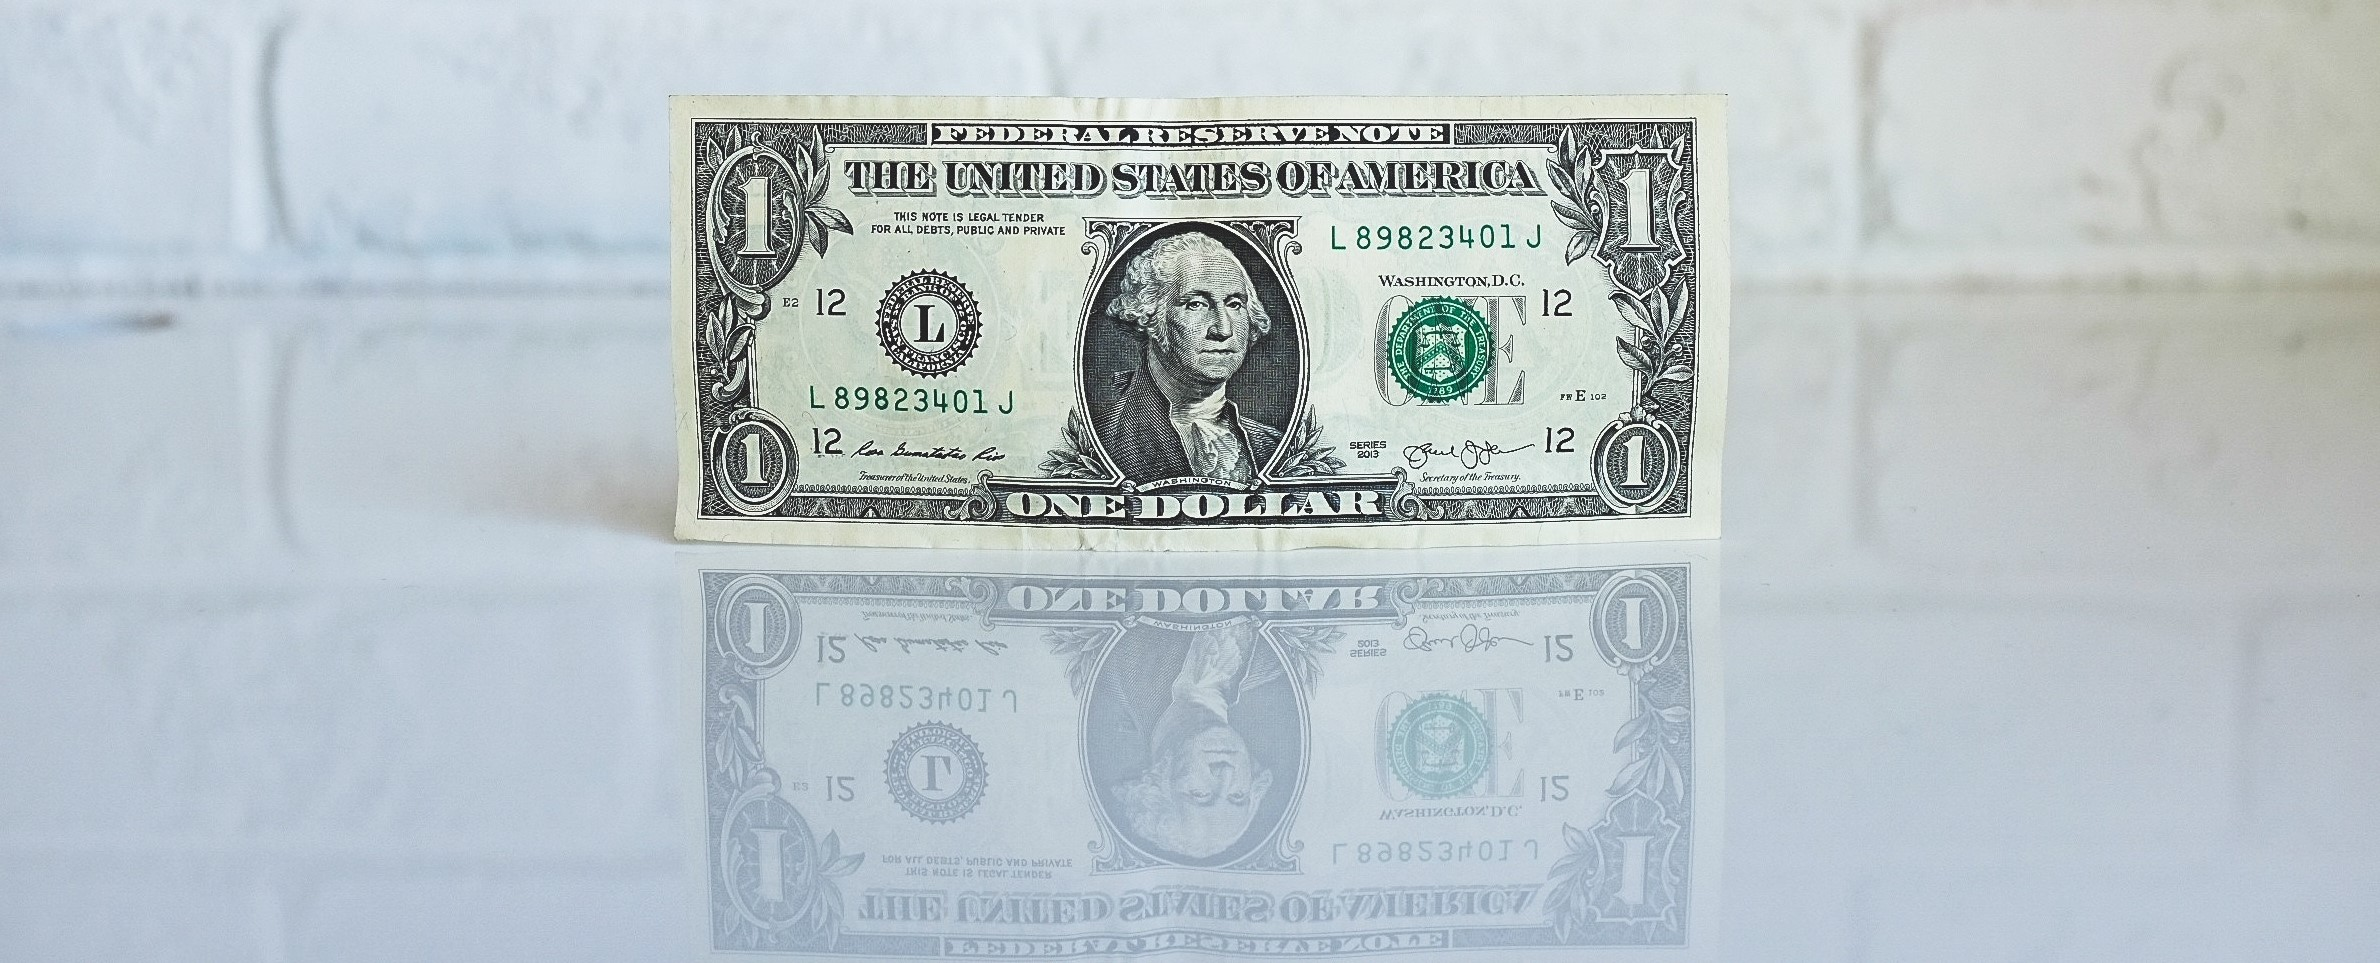

#Análise de Dívida Internacional

Os seres humanos não contraem dívidas apenas para gerenciar necessidades. Um país também pode contrair dívidas para gerenciar sua economia. Por exemplo, os gastos com infraestrutura são um ingrediente custoso e necessário para que os cidadãos de um país possam levar vidas confortáveis. O Banco Mundial é a organização que fornece dívida a países.

Neste projeto, você vai analisar dados de dívida internacional coletados pelo Banco Mundial. O conjunto de dados contém informações sobre o montante da dívida (em USD) devida por países em desenvolvimento em diversas categorias. Você vai encontrar as respostas para as seguintes perguntas:

*   Qual é o número de países distintos presentes no banco de dados?
*   Qual país tem a maior quantidade de dívida?
*   Qual país tem a menor quantidade de amortizações?

Abaixo está uma descrição da tabela com a qual você irá trabalhar:

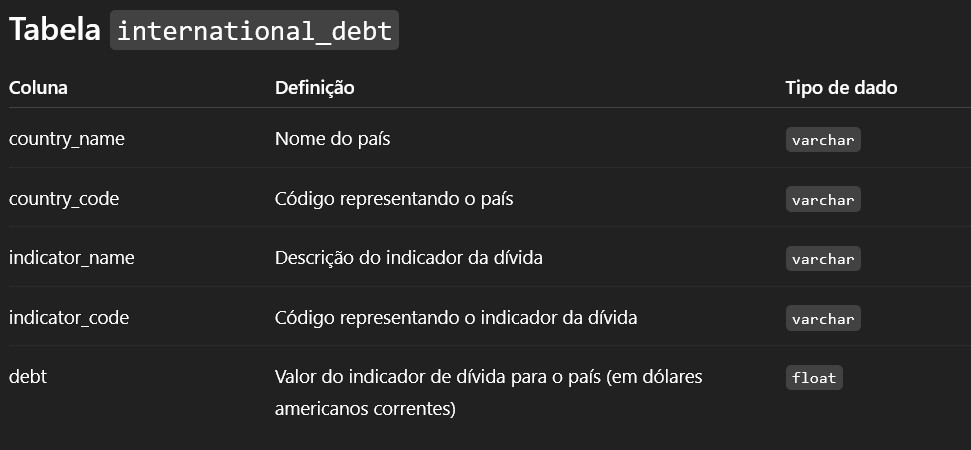

Você deverá executar consultas SQL para responder às três perguntas listadas acima.

#Tarefa 1
*   Qual é o número de países distintos presentes no banco de dados?
*   A saída deve ter apenas uma linha e uma coluna com o alias total_distinct_countries.
*   Salve a consulta como num_distinct_countries.
*   num_distinct_countries

In [9]:
query_01 = '''
SELECT COUNT(DISTINCT country_name) AS total_distinct_countries
FROM international_debt;
'''

# Executar e visualizar o resultado
from IPython.display import display
result_01 = pd.read_sql_query(query_01, conn)
display(result_01)



,total_distinct_countries
0,124


#Tarefa 2

*   Qual país possui o maior valor de dívida?
*   A saída deve conter duas colunas: country_name e total_debt, e apenas uma linha.
*   Salve a consulta como highest_debt_country.
*   highest_debt_country



In [4]:
query_02 = '''
SELECT country_name, SUM(debt) AS total_debt
FROM international_debt
GROUP BY country_name
ORDER BY total_debt DESC
LIMIT 1;
'''

from IPython.display import display
# Executar e visualizar o resultado
result_02 = pd.read_sql_query(query_02, conn)
display(result_02)

,country_name,total_debt
0,China,2.857935e+11


# Tarefa 3

*   Qual país apresenta o menor valor de amortizações do principal (indicado pelo código do indicador "DT.AMT.DLXF.CD")?
*   A tabela de saída deve conter três colunas: country_name, indicator_name e lowest_repayment, e apresentar apenas uma linha.
*   Salve a consulta como lowest_principal_repayment.
*   lowest_principal_repayment

In [8]:
query_03 = '''
SELECT country_name,
	   indicator_name,
	   MIN(debt) AS lowest_repayment
FROM international_debt
WHERE indicator_code = 'DT.AMT.DLXF.CD'
GROUP BY country_name, indicator_name
ORDER BY lowest_repayment ASC
LIMIT(1);
'''

from IPython.display import display
# Executar e visualizar o resultado
result_03 = pd.read_sql_query(query_03, conn)
display(result_03)

,country_name,indicator_name,lowest_repayment
0,Timor-Leste,"Principal repayments on external debt, long-te...",825000.0
